In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sal = pd.read_csv('merged_cbsa_salary.csv')

In [3]:
sal.head(5)

,Unnamed: 0,zip,function.,sup1,sup2,sup3,sup4,sup5,salary,gender,...,Types.of.Health.Insurance.Coverage.by.Age..65.years.and.over..With.two.or.more.types.of.health.insurance.coverage.With.direct.purchase.and.Medicare.coverage,Types.of.Health.Insurance.Coverage.by.Age..65.years.and.over..With.two.or.more.types.of.health.insurance.coverage.With.Medicare.and.Medicaid.means.tested.public.coverage,Types.of.Health.Insurance.Coverage.by.Age..65.years.and.over..With.two.or.more.types.of.health.insurance.coverage.Other.private.only.combinations,Types.of.Health.Insurance.Coverage.by.Age..65.years.and.over..With.two.or.more.types.of.health.insurance.coverage.Other.public.only.combinations,Types.of.Health.Insurance.Coverage.by.Age..65.years.and.over..With.two.or.more.types.of.health.insurance.coverage.Other.coverage.combinations,Types.of.Health.Insurance.Coverage.by.Age..65.years.and.over..No.health.insurance.coverage,married,divorced,bad_english,poverty
0,1,1003,position1,4,4,0,0,0,77308,M,...,16686,9442,0,1289,18508,194,42.023943,10.485747,7.930932,16.801532
1,2,1003,position15,0,2,0,60,0,38120,M,...,16686,9442,0,1289,18508,194,42.023943,10.485747,7.930932,16.801532
2,3,1003,position15,1,0,0,60,2,55335,W,...,16686,9442,0,1289,18508,194,42.023943,10.485747,7.930932,16.801532
3,4,1003,position4,1,0,0,35,1,70863,W,...,16686,9442,0,1289,18508,194,42.023943,10.485747,7.930932,16.801532
4,5,1003,position9,1,0,0,100,0,56557,M,...,16686,9442,0,1289,18508,194,42.023943,10.485747,7.930932,16.801532


In [4]:
sal.mean()

Unnamed: 0                                                                                                                                                                      1111.500000
zip                                                                                                                                                                            56712.063006
sup1                                                                                                                                                                               1.431593
sup2                                                                                                                                                                               0.763726
sup3                                                                                                                                                                               0.624212
sup4                                                        

In [5]:
sal['missingSalary'] = pd.isnull(sal['salary'])
sal2 = sal[(sal.missingSalary == False)]
# elminates missing Y values

In [7]:
# list of X vars to include
X_numeric_features = ['sup1', 'sup2', 'sup3', 'sup4', 'sup5', 'disabled', 'yearsinposition', 
         'yearsinprofession', 'age', 'cred1', 'cred2', 'inst1', 'inst2', 'inst3', 'inst4', 'inst5', 'instbudget', 'instsize']
X_numeric = sal2[X_numeric_features]
X_categorical_features = ['function.', 'gender', 'race', 'highestdegree', 'category', 'insttype']
X_categorical = sal2[X_categorical_features]

In [11]:
# extra data
# X_extra_features = ['median', 'mean', 'pop', 'snap', 'renter', 'median_rent', 'full_time', 'high_rent_burden']
# X_extra = sal2[X_extra_features]

#X_extra = sal2.iloc[:,30:124].values
X_extra = sal2.loc[:,'ZCTA5':'poverty'].values

In [13]:
# create dummy variables for each of the categorical features
# DOC: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

function_dummies = pd.get_dummies(X_categorical['function.'])
gender_dummies = pd.get_dummies(X_categorical['gender'])
race_dummies = pd.get_dummies(X_categorical['race'])
highestdegree_dummies = pd.get_dummies(X_categorical['highestdegree'])
category_dummies = pd.get_dummies(X_categorical['category'])
insttype_dummies = pd.get_dummies(X_categorical['insttype'])

X_dummy_features = pd.concat([function_dummies, gender_dummies, race_dummies, highestdegree_dummies, category_dummies, insttype_dummies], axis=1)

# convert to ndarray
X_dummy_features = X_dummy_features.as_matrix()

In [14]:
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [15]:
imp.fit(X_extra)
X_extra_imputed = imp.transform(X_extra)

In [16]:
X = np.concatenate((X_dummy_features, X_numeric_imputed, X_extra_imputed), axis=1)

In [17]:
# y is salary
y = sal2.iloc[:, 7].values

In [18]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [19]:
# keep track of variance on test data, to graph
var_to_graph = {}
# bring residual sum of squares from regression1.ipynb
var_to_graph['simpReg'] = 265376883.08

In [20]:
from sklearn import datasets, linear_model
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Intercept: 
 3.35065308832e-10
Coefficients: 
 [  6.80008992e-12   5.10615270e-12  -7.71544254e-12   4.97476341e-12
   4.04901861e-13   2.23718859e-11   6.06820835e-12  -7.74577115e-12
   8.86256942e-12   1.47050170e-11   1.24808012e-11   7.39600574e-12
   5.01887772e-12   1.21967839e-11   1.07202762e-11   1.27052279e-11
   2.80894060e-11   8.04610187e-12   6.40355684e-11   6.18169795e-12
   1.73674899e-11   8.66069282e-12   6.53384877e-12   9.93399259e-12
   8.83055304e-12   7.50089238e-12   5.13230246e-13   1.06091510e-11
   2.35243261e-11   2.41885467e-11  -2.80904707e-11  -2.15130158e-11
  -2.16861153e-11  -2.65367484e-11  -2.35912998e-11  -2.95007883e-11
  -2.91824715e-11   3.76992437e-13  -2.19518880e-12  -3.82350550e-12
  -3.57334832e-12  -1.63238412e-12   2.28961697e-11  -2.28850116e-11
  -6.97680853e-11  -7.83654120e-11  -1.71515905e-13  -1.06784373e-13
  -6.11421504e-13   2.01973854e-14   1.00000000e+00   3.32315005e-12
  -4.46190936e-14   5.04232073e-14  -4.77534678e-14   4.

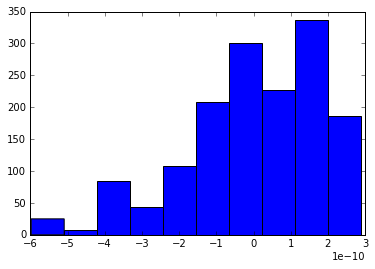

Distribution of prediction error on test data:


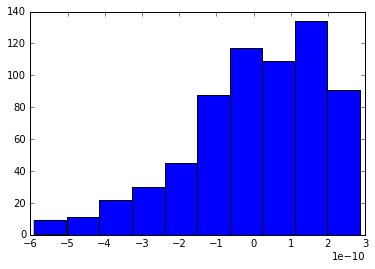

In [21]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_linear'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

In [23]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X_poly, y, test_size=0.3, random_state=0)

Intercept: 
 1.13283511063
Coefficients: 
 [  1.26150960e-04  -1.04952406e-02   4.71779009e-03 ...,   1.94770305e-05
   5.82777282e-06  -7.41057887e-06]
Residual sum of squares, training data: 0.00
Residual sum of squares, test data: 0.18
Variance score, training data: 1.00
Distribution of prediction error on training data:


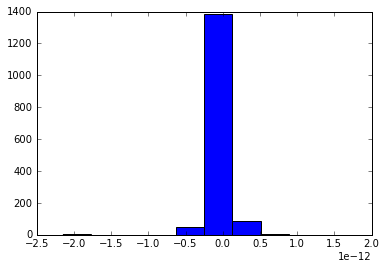

Distribution of prediction error on test data:


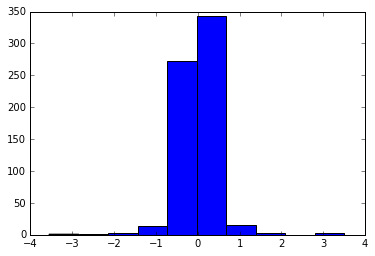

In [24]:
## POLYNOMINAL 
# Create linear regression object
poly = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
poly.fit(X_train, y_train)

# The intercept
print('Intercept: \n', poly.intercept_)
# The coefficients
print('Coefficients: \n', poly.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((poly.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((poly.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_poly'] = np.mean((poly.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % poly.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = poly.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = poly.predict(X_test) - y_test
plt.hist(predError)
plt.show()

Intercept: 
 -0.00130189941234
Coefficients: 
 [ -9.91202158e-06  -1.65015495e-05   1.20594788e-05   2.17921128e-05
   4.56471682e-05  -7.13303712e-06  -8.01553751e-06   9.09264140e-05
  -1.41901608e-05   3.41957693e-07  -1.44419426e-06   3.07385366e-05
   9.45633722e-07  -9.21461598e-06  -5.26944391e-07  -2.68502874e-06
  -7.20307648e-06  -1.30721306e-05  -4.97422809e-06   3.18009973e-05
   5.73746672e-06   1.83009939e-06   9.65806383e-07  -1.20952093e-05
   2.94361761e-05  -5.72974278e-06   1.60693900e-05  -2.50899582e-06
  -1.87471727e-05  -1.68913510e-05   3.30655697e-06   1.47630308e-06
   2.78699232e-06   3.04035745e-06   3.14261648e-09   2.60910309e-05
   6.26061183e-06   4.57180027e-06   1.61487732e-06   1.33967964e-06
   1.07312659e-05   4.18178852e-06  -3.06175310e-05   3.06175310e-05
   1.76496686e-05  -1.00191400e-06   9.37532303e-06  -1.28595495e-06
  -5.70149576e-06  -9.01196196e-09   9.99994707e-01   3.04590474e-06
  -1.01064377e-06   7.50197365e-07   5.70967598e-08  -1.

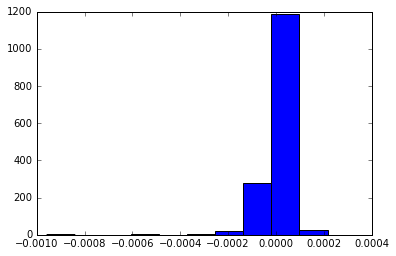

Distribution of prediction error on test data:


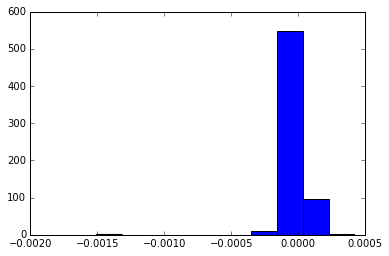

In [25]:
## RIDGE REGRESSION
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

# Create linear regression object
regr = linear_model.Ridge()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_ridge'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

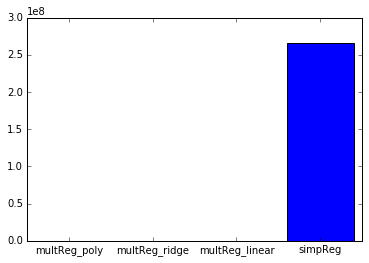

In [26]:
# bar graph of dict with Residual Sum of Squares on test datasets

#var_to_graph['multReg_poly'] = 0
plt.bar(range(len(var_to_graph)), var_to_graph.values(), align='center')
plt.xticks(range(len(var_to_graph)), var_to_graph.keys())

plt.show()